In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the CSV file into a DataFrame
data = pd.read_csv('../data/raw/Base.csv')

In [4]:
# Convert the variables to the appropriate data types
data['fraud_bool'] = data['fraud_bool'].astype('category')
data['payment_type'] = data['payment_type'].astype('category')
data['employment_status'] = data['employment_status'].astype('category')
data['email_is_free'] = data['email_is_free'].astype('uint8')
data['housing_status'] = data['housing_status'].astype('category')
data['phone_home_valid'] = data['phone_home_valid'].astype('uint8')
data['phone_mobile_valid'] = data['phone_mobile_valid'].astype('uint8')
data['has_other_cards'] = data['has_other_cards'].astype('uint8')
data['foreign_request'] = data['foreign_request'].astype('uint8')
data['source'] = data['source'].astype('category')
data['device_os'] = data['device_os'].astype('category')

In [5]:
# Data Cleaning
data['intended_balcon_amount'] = data['intended_balcon_amount'].apply(lambda x: -1 if x < 0 else x)
data = data[(data['current_address_months_count'] >= 0) & (data['session_length_in_minutes'] >= 0) & (data['device_distinct_emails_8w'] >= 0)]

In [6]:
data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-1.000000,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.000000,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.000000,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-1.000000,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.000000,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

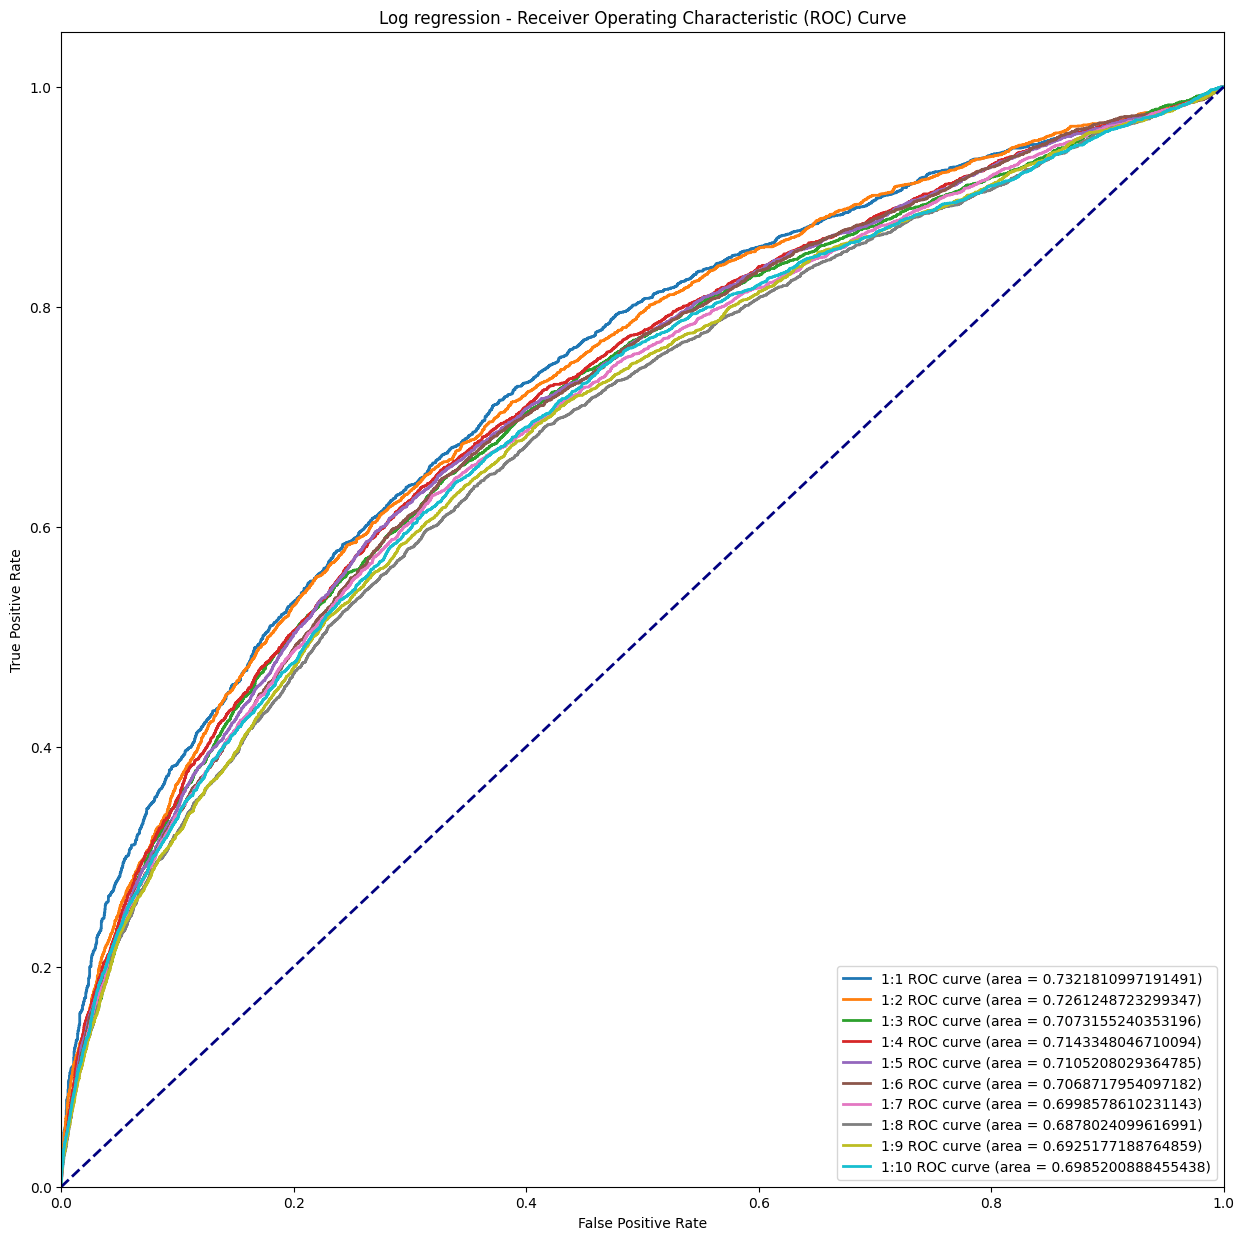

  Model  Accuracy  Precision    Recall  F1 Score
0   1:1  0.667879   0.669888  0.668878  0.669383
1   1:2  0.720998   0.624717  0.416667  0.499909
2   1:3  0.767318   0.610156  0.223121  0.326754
3   1:4  0.809616   0.661677  0.131704  0.219682
4   1:5  0.838614   0.598753  0.087565  0.152785
5   1:6  0.859939   0.602041  0.053734  0.098662
6   1:7  0.878164   0.543860  0.057319  0.103708
7   1:8  0.890592   0.613445  0.022290  0.043017
8   1:9  0.901016   0.673267  0.020606  0.039988
9  1:10  0.910071   0.612676  0.026404  0.050626


In [9]:
result_label_logR = []
accuracydata_result_logR = []
precisiondata_result_logR = []
recalldata_result_logR = []
fprdata_result_logR = []
tprdata_result_logR = []
thresholdsdata_result_logR = []
roc_aucdata_result_logR = []

### ONE HOT ENCONDING OF CAT VARIABLE
dff_label = data['fraud_bool']
# Split data into numerical and categorical
df_cat = data.drop(columns='fraud_bool').select_dtypes(include=['category'])
df_num = data.drop(columns='fraud_bool').select_dtypes(exclude=['category'])
# One hot encoding for categorical data
df_cat_hot = pd.get_dummies(df_cat)
# combine numerical and one hot encoded categorical data
dff = pd.concat([df_num, df_cat_hot, dff_label], axis=1)


### TESTING MODEL ACCURACY OVER DIFFEENT SAMPLING RATIO
for i in range(1, 11):
    ### UNDERSAMPLING
    # separate fraud and non-fraud data
    fraud = dff[dff['fraud_bool'] == 1]
    not_fraud = dff[dff['fraud_bool'] == 0]

    # Randomly sample non-fraud data to create a balanced dataset
    undersampled_not_fraud = not_fraud.sample(n=len(fraud)*i, random_state=42)

    # Combine fraud and undersampled non-fraud data
    downsize_dff = pd.concat([fraud, undersampled_not_fraud], axis=0)

    # Assuming X  = features and y = labels
    label = "1:" + str(i)
    X = downsize_dff.drop(columns='fraud_bool')
    y = downsize_dff['fraud_bool']

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 2: Create and train the gradient boosting classifier
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Step 3: Make predictions
    y_pred = model.predict(X_test)

    # Step 4: Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Step 5: Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)


    result_label_logR.append(label)
    accuracydata_result_logR.append(accuracy)
    precisiondata_result_logR.append(precision)
    recalldata_result_logR.append(recall)
    fprdata_result_logR.append(fpr)
    tprdata_result_logR.append(tpr)
    thresholdsdata_result_logR.append(thresholds)
    roc_aucdata_result_logR.append(roc_auc)


### RESULTS VISUALISATION
plt.figure(figsize=(15, 15))
for i in range(len(result_label_logR)):
    plt.plot(fprdata_result_logR[i], tprdata_result_logR[i], lw=2, label='{0} ROC curve (area = {1})'.format(result_label_logR[i], roc_aucdata_result_logR[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log regression - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

results_df = pd.DataFrame({
    'Model': result_label_logR,
    'Accuracy': accuracydata_result_logR,
    'Precision': precisiondata_result_logR,
    'Recall': recalldata_result_logR,
    'F1 Score' : [(2 * p * r) / (p + r) for p, r in zip(precisiondata_result_logR, recalldata_result_logR)]
})

# Display the DataFrame
print(results_df)

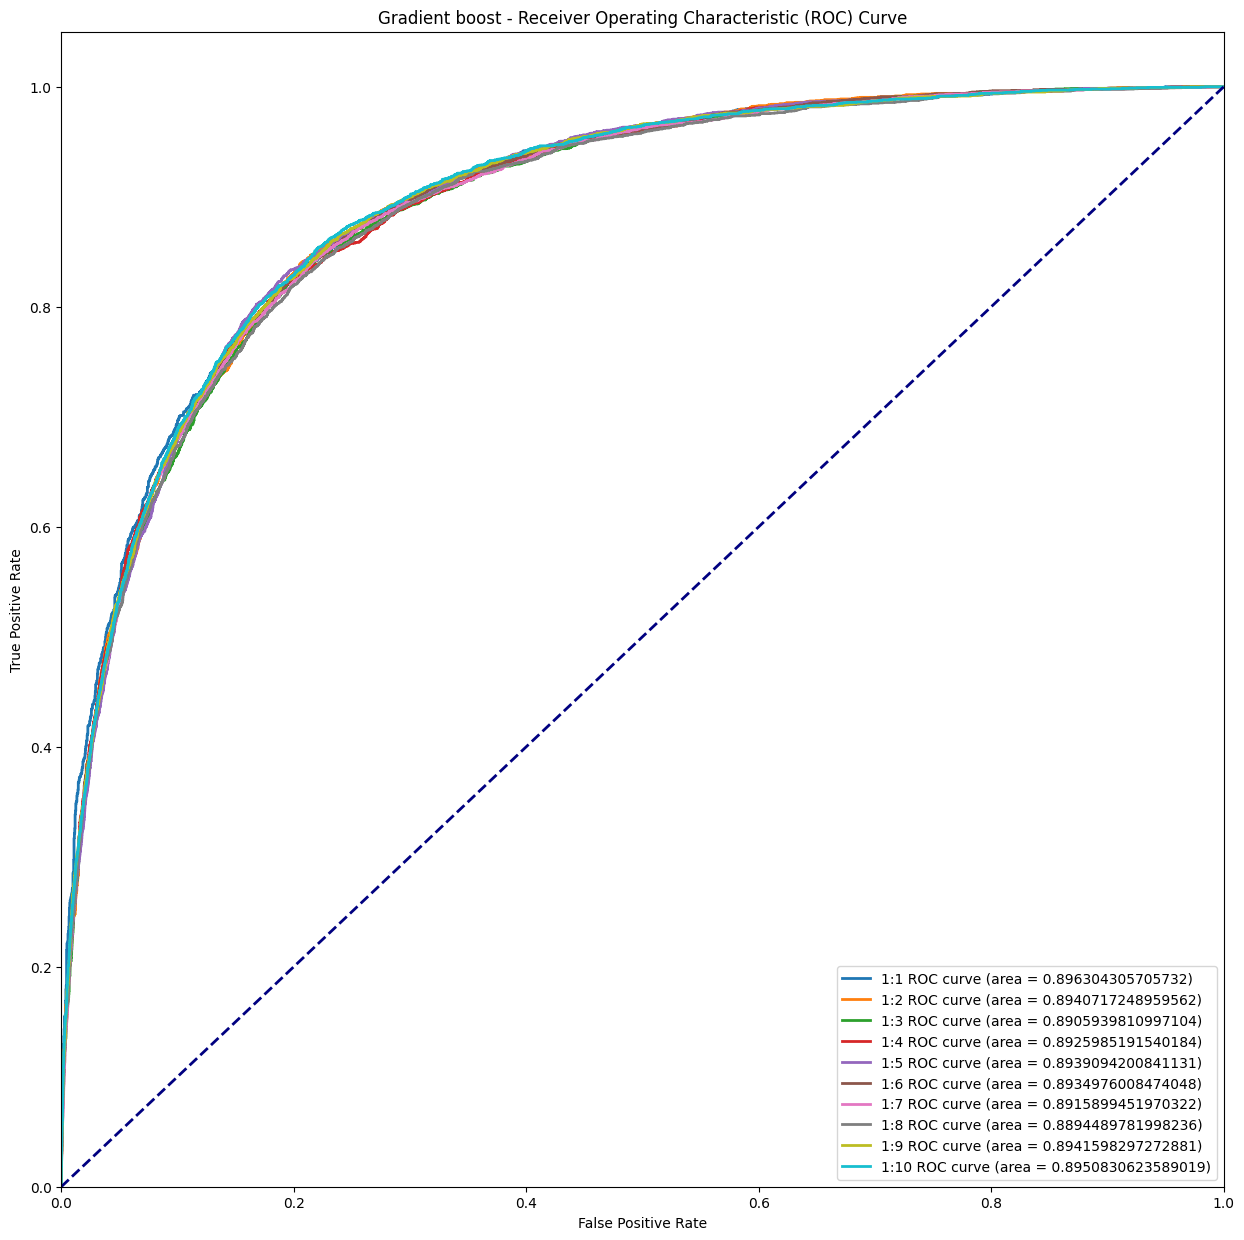

  Model  Accuracy  Precision    Recall  F1 Score
0   1:1  0.811429   0.819162  0.801870  0.810424
1   1:2  0.826698   0.792384  0.653382  0.716201
2   1:3  0.845233   0.762870  0.563642  0.648295
3   1:4  0.864730   0.754180  0.497318  0.599389
4   1:5  0.878581   0.723061  0.436607  0.544455
5   1:6  0.892594   0.724614  0.398604  0.514297
6   1:7  0.903630   0.709928  0.365794  0.482815
7   1:8  0.910398   0.699029  0.329771  0.448133
8   1:9  0.917811   0.700204  0.312121  0.431775
9  1:10  0.924292   0.699128  0.291958  0.411903


In [13]:
result_label_GB = []
accuracydata_result_GB = []
precisiondata_result_GB = []
recalldata_result_GB = []
fprdata_result_GB = []
tprdata_result_GB = []
thresholdsdata_result_GB = []
roc_aucdata_result_GB = []

### ONE HOT ENCONDING OF CAT VARIABLE
dff_label = data['fraud_bool']
# Split data into numerical and categorical
df_cat = data.drop(columns='fraud_bool').select_dtypes(include=['category'])
df_num = data.drop(columns='fraud_bool').select_dtypes(exclude=['category'])
# One hot encoding for categorical data
df_cat_hot = pd.get_dummies(df_cat)
# combine numerical and one hot encoded categorical data
dff = pd.concat([df_num, df_cat_hot, dff_label], axis=1)


### TESTING MODEL ACCURACY OVER DIFFEENT SAMPLING RATIO
for i in range(1, 11):
    ### UNDERSAMPLING
    # separate fraud and non-fraud data
    fraud = dff[dff['fraud_bool'] == 1]
    not_fraud = dff[dff['fraud_bool'] == 0]

    # Randomly sample non-fraud data to create a balanced dataset
    undersampled_not_fraud = not_fraud.sample(n=len(fraud)*i, random_state=42)

    # Combine fraud and undersampled non-fraud data
    downsize_dff = pd.concat([fraud, undersampled_not_fraud], axis=0)

    # Assuming X  = features and y = labels
    label = "1:" + str(i)
    X = downsize_dff.drop(columns='fraud_bool')
    y = downsize_dff['fraud_bool']

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 2: Create and train the gradient boosting classifier
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    # Step 3: Make predictions
    y_pred = model.predict(X_test)

    # Step 4: Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Step 5: Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)


    result_label_GB.append(label)
    accuracydata_result_GB.append(accuracy)
    precisiondata_result_GB.append(precision)
    recalldata_result_GB.append(recall)
    fprdata_result_GB.append(fpr)
    tprdata_result_GB.append(tpr)
    thresholdsdata_result_GB.append(thresholds)
    roc_aucdata_result_GB.append(roc_auc)


### RESULTS VISUALISATION
plt.figure(figsize=(15, 15))
for i in range(len(result_label_GB)):
    plt.plot(fprdata_result_GB[i], tprdata_result_GB[i], lw=2, label='{0} ROC curve (area = {1})'.format(result_label_GB[i], roc_aucdata_result_GB[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient boost - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

results_df = pd.DataFrame({
    'Model': result_label_GB,
    'Accuracy': accuracydata_result_GB,
    'Precision': precisiondata_result_GB,
    'Recall': recalldata_result_GB,
    'F1 Score' : [(2 * p * r) / (p + r) for p, r in zip(precisiondata_result_GB, recalldata_result_GB)]
})

# Display the DataFrame
print(results_df)

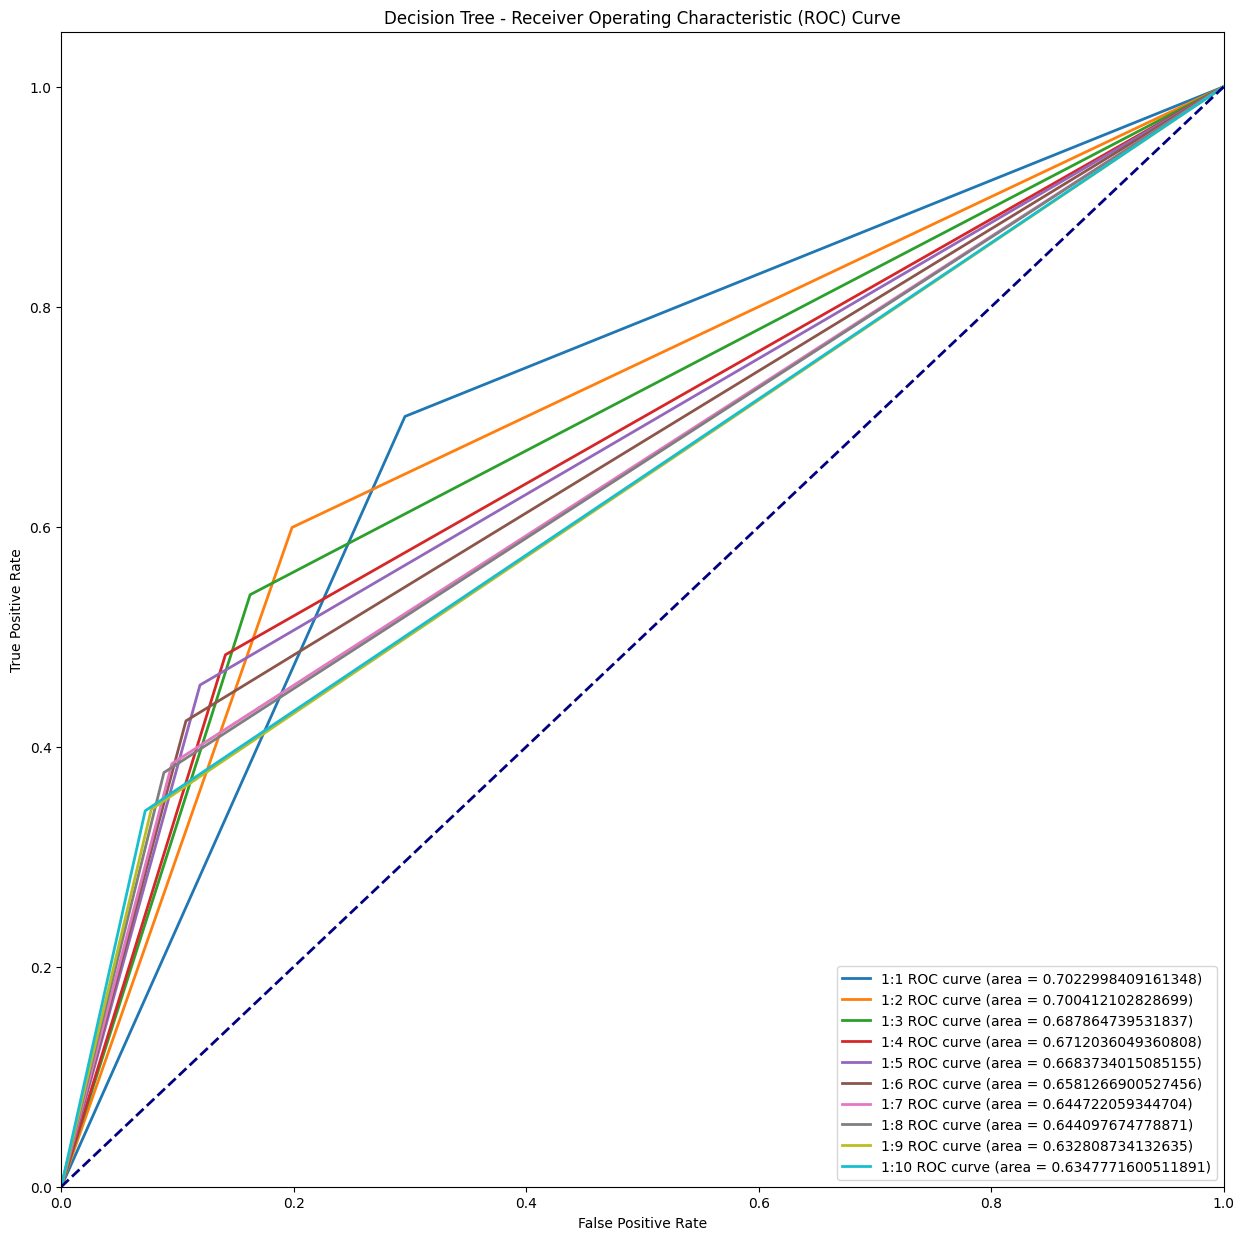

  Model  Accuracy  Precision    Recall  F1 Score
0   1:1  0.702289   0.705346  0.700241  0.702785
1   1:2  0.733832   0.602977  0.599336  0.601151
2   1:3  0.761786   0.528840  0.538185  0.533472
3   1:4  0.782453   0.466647  0.483611  0.474978
4   1:5  0.810116   0.432401  0.456066  0.443918
5   1:6  0.825812   0.396532  0.423497  0.409571
6   1:7  0.840875   0.361739  0.384592  0.372816
7   1:8  0.852663   0.345863  0.376489  0.360526
8   1:9  0.864605   0.330029  0.343030  0.336404
9  1:10  0.874600   0.321072  0.341730  0.331079


In [17]:
result_label_DT = []
accuracydata_result_DT = []
precisiondata_result_DT = []
recalldata_result_DT = []
fprdata_result_DT = []
tprdata_result_DT = []
thresholdsdata_result_DT = []
roc_aucdata_result_DT = []

### ONE HOT ENCONDING OF CAT VARIABLE
dff_label = data['fraud_bool']
# Split data into numerical and categorical
df_cat = data.drop(columns='fraud_bool').select_dtypes(include=['category'])
df_num = data.drop(columns='fraud_bool').select_dtypes(exclude=['category'])
# One hot encoding for categorical data
df_cat_hot = pd.get_dummies(df_cat)
# combine numerical and one hot encoded categorical data
dff = pd.concat([df_num, df_cat_hot, dff_label], axis=1)


### TESTING MODEL ACCURACY OVER DIFFEENT SAMPLING RATIO
for i in range(1, 11):
    ### UNDERSAMPLING
    # separate fraud and non-fraud data
    fraud = dff[dff['fraud_bool'] == 1]
    not_fraud = dff[dff['fraud_bool'] == 0]

    # Randomly sample non-fraud data to create a balanced dataset
    undersampled_not_fraud = not_fraud.sample(n=len(fraud)*i, random_state=42)

    # Combine fraud and undersampled non-fraud data
    downsize_dff = pd.concat([fraud, undersampled_not_fraud], axis=0)

    # Assuming X  = features and y = labels
    label = "1:" + str(i)
    X = downsize_dff.drop(columns='fraud_bool')
    y = downsize_dff['fraud_bool']

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 2: Create and train the gradient boosting classifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Step 3: Make predictions
    y_pred = model.predict(X_test)

    # Step 4: Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Step 5: Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)


    result_label_DT.append(label)
    accuracydata_result_DT.append(accuracy)
    precisiondata_result_DT.append(precision)
    recalldata_result_DT.append(recall)
    fprdata_result_DT.append(fpr)
    tprdata_result_DT.append(tpr)
    thresholdsdata_result_DT.append(thresholds)
    roc_aucdata_result_DT.append(roc_auc)


### RESULTS VISUALISATION
plt.figure(figsize=(15, 15))
for i in range(len(result_label_DT)):
    plt.plot(fprdata_result_DT[i], tprdata_result_DT[i], lw=2, label='{0} ROC curve (area = {1})'.format(result_label_DT[i], roc_aucdata_result_DT[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

results_df = pd.DataFrame({
    'Model': result_label_DT,
    'Accuracy': accuracydata_result_DT,
    'Precision': precisiondata_result_DT,
    'Recall': recalldata_result_DT,
    'F1 Score' : [(2 * p * r) / (p + r) for p, r in zip(precisiondata_result_DT, recalldata_result_DT)]
})

# Display the DataFrame
print(results_df)